In [18]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf #needed for models in this script
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [6]:
pd.set_option('html', True) #see the dataframe in a more user friendly manner
%matplotlib inline

## Explanation of Multivariate Analysis

In multivariate analysis, we again test the coefficients for their significance to understand the relationship between them and "y". Adding new variables can increase the number of issues one has to juggle to produce a model.

The first issue is that with many variables, it often becomes difficult to visualize all the possible relationships. With a single "y" and a single "x", we can plot the two using a standard two-dimensional plot and try to visually gauge the strength of their relationship. This process can be extended to multiple variables—you can plot all your possible explanatory variables and then pick the one with the strongest visual correlation with "y". If you wanted to, you could take the residuals of this regression you created and then try to plot the remaining explanatory variables against these residuals and add the variable to the original equation. This process can be repeated for many steps. Some more formal techniques, like stepwise regressions, extend this intuition in a more rigorous way, iteractively adding (or subtracting) a single variable that has the most explanatory power in the current version of the model.

Producing graphs over and over again is obviously tedious and it may not be a terribly effective technique without serious modifications. Rather than relying on visual plots, we often start with a correlation matrix that is a square matrix with the correlations of all candidate variables. A correlation matrix not only shows which variables have the strongest relationship with the response variable, but it can show which variables have a strong relationship with each other, a concept that is important in multivariable linear models. For those who still want a visual analysis, there are lattice graphs that combine 2-dimensional correlation plots into a single compact graph.

The process of deciding which variables to add to a model is often shaped by the goal of the modeling process. If the goal is simply to boost the R-squared (it shouldn't be), then adding as many variables as possible will do the trick. Adding extra variables will never subtract from R-squared, so most novice modelers will often make the mistake of throwing in as much data as they can get their hands on in order to boost the R-squared measure of the model.

The problem with this approach is that it exposes to model to overfitting. Overfitting a model involves fitting a model so tightly to the existing data that the model sacrifices accuracy when it encounters new data. This is a prevalent issue when trying to forecast data; overfitting a model to the current batch of data makes it a worse predictor when it is used to predict results not used to fit the original model. To get around this issue, formal modeling techniques use a penalty like Akaike's Information Criterion (AIC) or the Bayesian Information Criterion (BIC) which handicap a model's fit based on the number of parameters used.

Another issue with adding variables to a model is the notion of collinearity. Collinearity occurs when the explanatory variables of a model are related to one another. While this relationship may not affect the overall accuracy of the model, it makes it hard to interpret the impact of individual variables on the response variable, often a key goal of modeling. For example, if one were modeling fuel efficiency, one may try to incorporate weight and size (length and width) of the car into the model. Both of these variables when modeled individually would have a strong relationship with efficiency. However, when thrown into the same model, because they are closely related (bigger cars tend to weigh more) will likely affect the measures of significance of the coefficients. It often happens that when adding a new variable to a model in which all variables are significant, some of these old variables will become insignificant. The reason for this is that the new variable was linearly related to some of the old variables.

When adding new variables, keep in mind that new variables may not only be linearly related to the explanatory variable. It is often important to try various transformations (log, power) of the explanatory variable to improve a model. Also, two explanatory variables actually multiply the effects of one another, not just add to them. This multiplicative effect is known as interaction.

Finally, when creating a model with even one factor, it may not be clear if the explanatory factor is having a direct impact on the response variable or operating through a confounding factor. An example of this is using brand preference for a phone to determine voting preferences. The type of phone one owns is not likely to influence voting patterns, but the social-economic status and location (both confounding factors) of a customer may influence phone choice as well as voting decisions.

For more information on this topic, watch the lectures on multiple regression (https://www.youtube.com/watch?v=eLpfEml4Vak) and interpreting regression models (https://www.youtube.com/watch?v=7rJ7EkB_gTM&list=UUsF1NvsObHQ33-alJ_RuBIw&index=47) lectures by Jason Delaney.

## Multiple Regression Using Statsmodels

In Ordinary Least Squares Regression with a single variable we described the relationship between the predictor and the response with a straight line. In the case of multiple regression we extend this idea by fitting a p-dimensional hyperplane to our p predictors. 
We can show this for two predictor variables in a three dimensional plot. In the following example we will use the advertising dataset which consists of the sales of products and their advertising budget in three different media TV, radio, newspaper.

In [3]:
df_adv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df_adv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


The multiple regression model describes the response as a weighted sum of the predictors:

Sales=β0+β1×TV+β2×Radio

This model can be visualized as a 2-d plane in 3-d space:

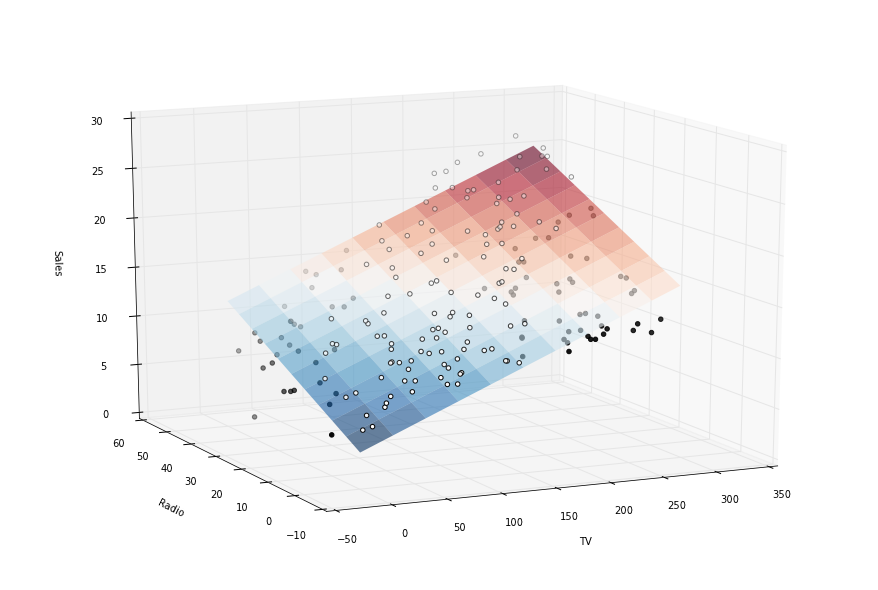

In [8]:
#code to create at bottom

The plot above shows data points above the hyperplane in white and points below the hyperplane in black. The color of the plane is determined by the corresonding predicted Sales values (blue = low, red = high). The Python code to generate the 3-d plot can be found in the appendix.

Just as with the single variable case, calling est.summary will give us detailed information about the model fit. You can find a description of each of the fields in the tables below in the previous blog post here: http://www.datarobot.com/blog/ordinary-least-squares-in-python/

In [13]:
X = df_adv[['TV', 'Radio']] #excluding Newspaper because it has little effect on sales when you include it; 
#better to isolate the two main drivers
y = df_adv['Sales']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 16 Oct 2015   Prob (F-statistic):           4.83e-98
Time:                        17:08:02   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000         2.340     3.502
TV             0.0458      0.001     32.909      0.000         0.043     0.048
Radio          0.1880      0.008     23.382      0.000         0.172     0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Handling Categorical Variables

Often in statistical learning and data analysis we encounter variables that are not quantitative. A common example is gender or geographic region. We would like to be able to handle them naturally. Here is a sample dataset investigating chronic heart disease.

In [14]:
df = pd.read_csv('http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data', index_col=0)
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [16]:
# copy data and separate predictors and response
X = df.copy()
y = X.pop('chd')

y.head()

row.names
1    1
2    1
3    0
4    1
5    1
Name: chd, dtype: int64

The variable famhist holds if the patient has a family history of coronary artery disease. The percentage of the response chd (chronic heart disease ) for patients with absent/present family history of coronary artery disease is:

In [17]:
# compute percentage of chronic heart disease for famhist
y.groupby(X.famhist).mean()

famhist
Absent     0.237037
Present    0.500000
Name: chd, dtype: float64

These two levels (absent/present) have a natural ordering to them, so we can perform linear regression on them, after we convert them to numeric. This can be done using pd.Categorical.

In [21]:
# encode df.famhist as a numeric via pd.Factor
df['famhist_ord'] = pd.Categorical(df.famhist).codes

#est = smf.ols(formula="chd ~ famhist_ord", data=df).fit()

In [22]:
df.dtypes

sbp              int64
tobacco        float64
ldl            float64
adiposity      float64
famhist         object
typea            int64
obesity        float64
alcohol        float64
age              int64
chd              int64
famhist_ord       int8
dtype: object

In [ ]:
# Code to Generate 3d plot at beginning:
from mpl_toolkits.mplot3d import Axes3D

X = df_adv[['TV', 'Radio']]
y = df_adv['Sales']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100), 
                       np.linspace(X.Radio.min(), X.Radio.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].TV, X[resid >= 0].Radio, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].TV, X[resid < 0].Radio, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()